In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#定義LeNet模型

In [2]:
class LeNet(tf.keras.Model):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(6, (5, 5), activation='relu')
        self.pool1 = tf.keras.layers.MaxPooling2D((2, 2))
        self.conv2 = tf.keras.layers.Conv2D(16, (5, 5), activation='relu')
        self.pool2 = tf.keras.layers.MaxPooling2D((2, 2))
        self.flatten = tf.keras.layers.Flatten()
        self.fc1 = tf.keras.layers.Dense(120, activation='relu')
        self.fc2 = tf.keras.layers.Dense(84, activation='relu')
        self.fc3 = tf.keras.layers.Dense(10, activation='softmax')

    def call(self, x):
        x = self.pool1(self.conv1(x))
        x = self.pool2(self.conv2(x))
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return self.fc3(x)

#創建和編譯模型

In [3]:
model = LeNet()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#加載MNIST數據

In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

11490434/11490434 [==============================] - 1s 0us/step


# 資料標準化

In [5]:
train_images = (train_images - 0.5) / 0.5
test_images = (test_images - 0.5) / 0.5

# 可視化一些訓練圖像

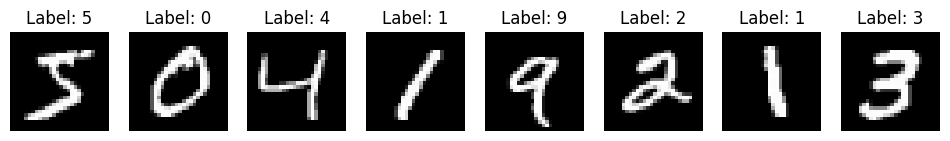

In [6]:
fig, axes = plt.subplots(1, 8, figsize=(12, 12))
for i in range(8):
    axes[i].imshow(train_images[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Label: {train_labels[i]}')
    axes[i].axis('off')
plt.show()

#訓練模型

Epoch 1/10
938/938 [==============================] - 23s 25ms/step - loss: 0.0147 - accuracy: 0.9950 - val_loss: 0.0384 - val_accuracy: 0.9898
Epoch 2/10
938/938 [==============================] - 23s 25ms/step - loss: 0.0122 - accuracy: 0.9960 - val_loss: 0.0495 - val_accuracy: 0.9859
Epoch 3/10
938/938 [==============================] - 23s 24ms/step - loss: 0.0123 - accuracy: 0.9958 - val_loss: 0.0347 - val_accuracy: 0.9902
Epoch 4/10
938/938 [==============================] - 23s 25ms/step - loss: 0.0117 - accuracy: 0.9961 - val_loss: 0.0410 - val_accuracy: 0.9900
Epoch 5/10
938/938 [==============================] - 22s 23ms/step - loss: 0.0089 - accuracy: 0.9970 - val_loss: 0.0459 - val_accuracy: 0.9897
Epoch 6/10
938/938 [==============================] - 23s 24ms/step - loss: 0.0102 - accuracy: 0.9966 - val_loss: 0.0462 - val_accuracy: 0.9881
Epoch 7/10
938/938 [==============================] - 23s 25ms/step - loss: 0.0079 - accuracy: 0.9973 - val_loss: 0.0521 - val_accuracy:

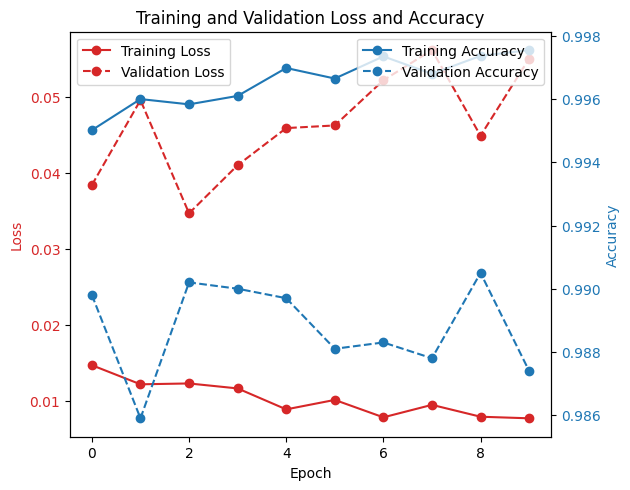

In [9]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# 可視化損失和準確率
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(history.history['loss'], marker='o', color=color, label='Training Loss')
ax1.plot(history.history['val_loss'], marker='o', linestyle='dashed', color=color, label='Validation Loss')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)  # we already handled the x-label with ax1
ax2.plot(history.history['accuracy'], marker='o', color=color, label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], marker='o', linestyle='dashed', color=color, label='Validation Accuracy')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Training and Validation Loss and Accuracy')
plt.show()

#評估模型

313/313 - 2s - loss: 0.0550 - accuracy: 0.9874 - 2s/epoch - 5ms/step
Test accuracy: 0.9873999953269958
313/313 [==============================] - 3s 9ms/step


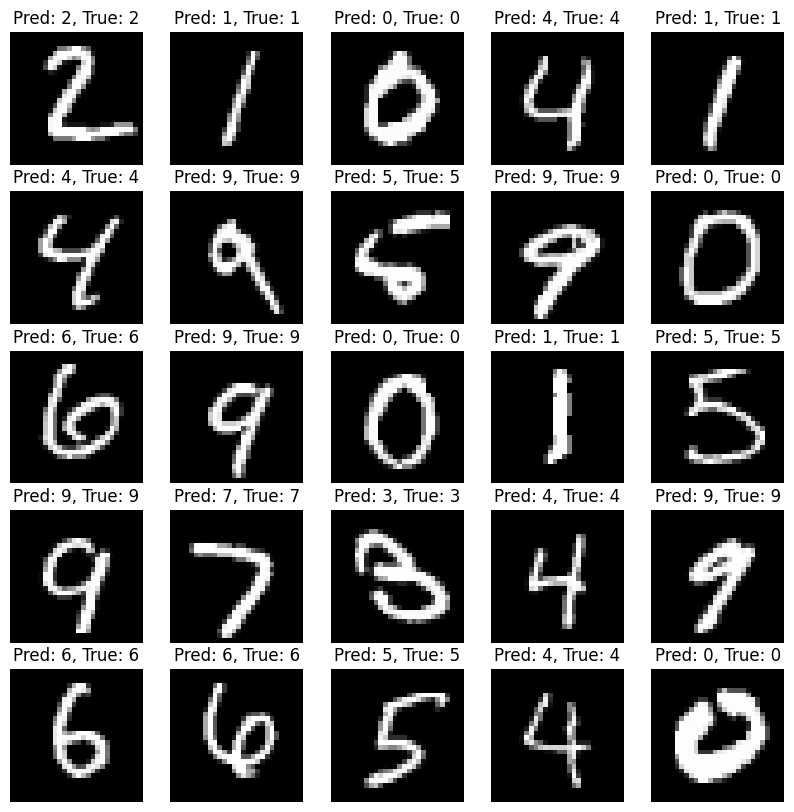

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

# 可視化一些預測結果
predictions = model.predict(test_images)

fig = plt.figure(figsize=(10, 10))
for i in range(1, 26):
    ax = fig.add_subplot(5, 5, i)
    ax.imshow(test_images[i].reshape(28, 28), cmap='gray')
    pred_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    ax.title.set_text(f'Pred: {pred_label}, True: {true_label}')
    ax.axis('off')
plt.show()